/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


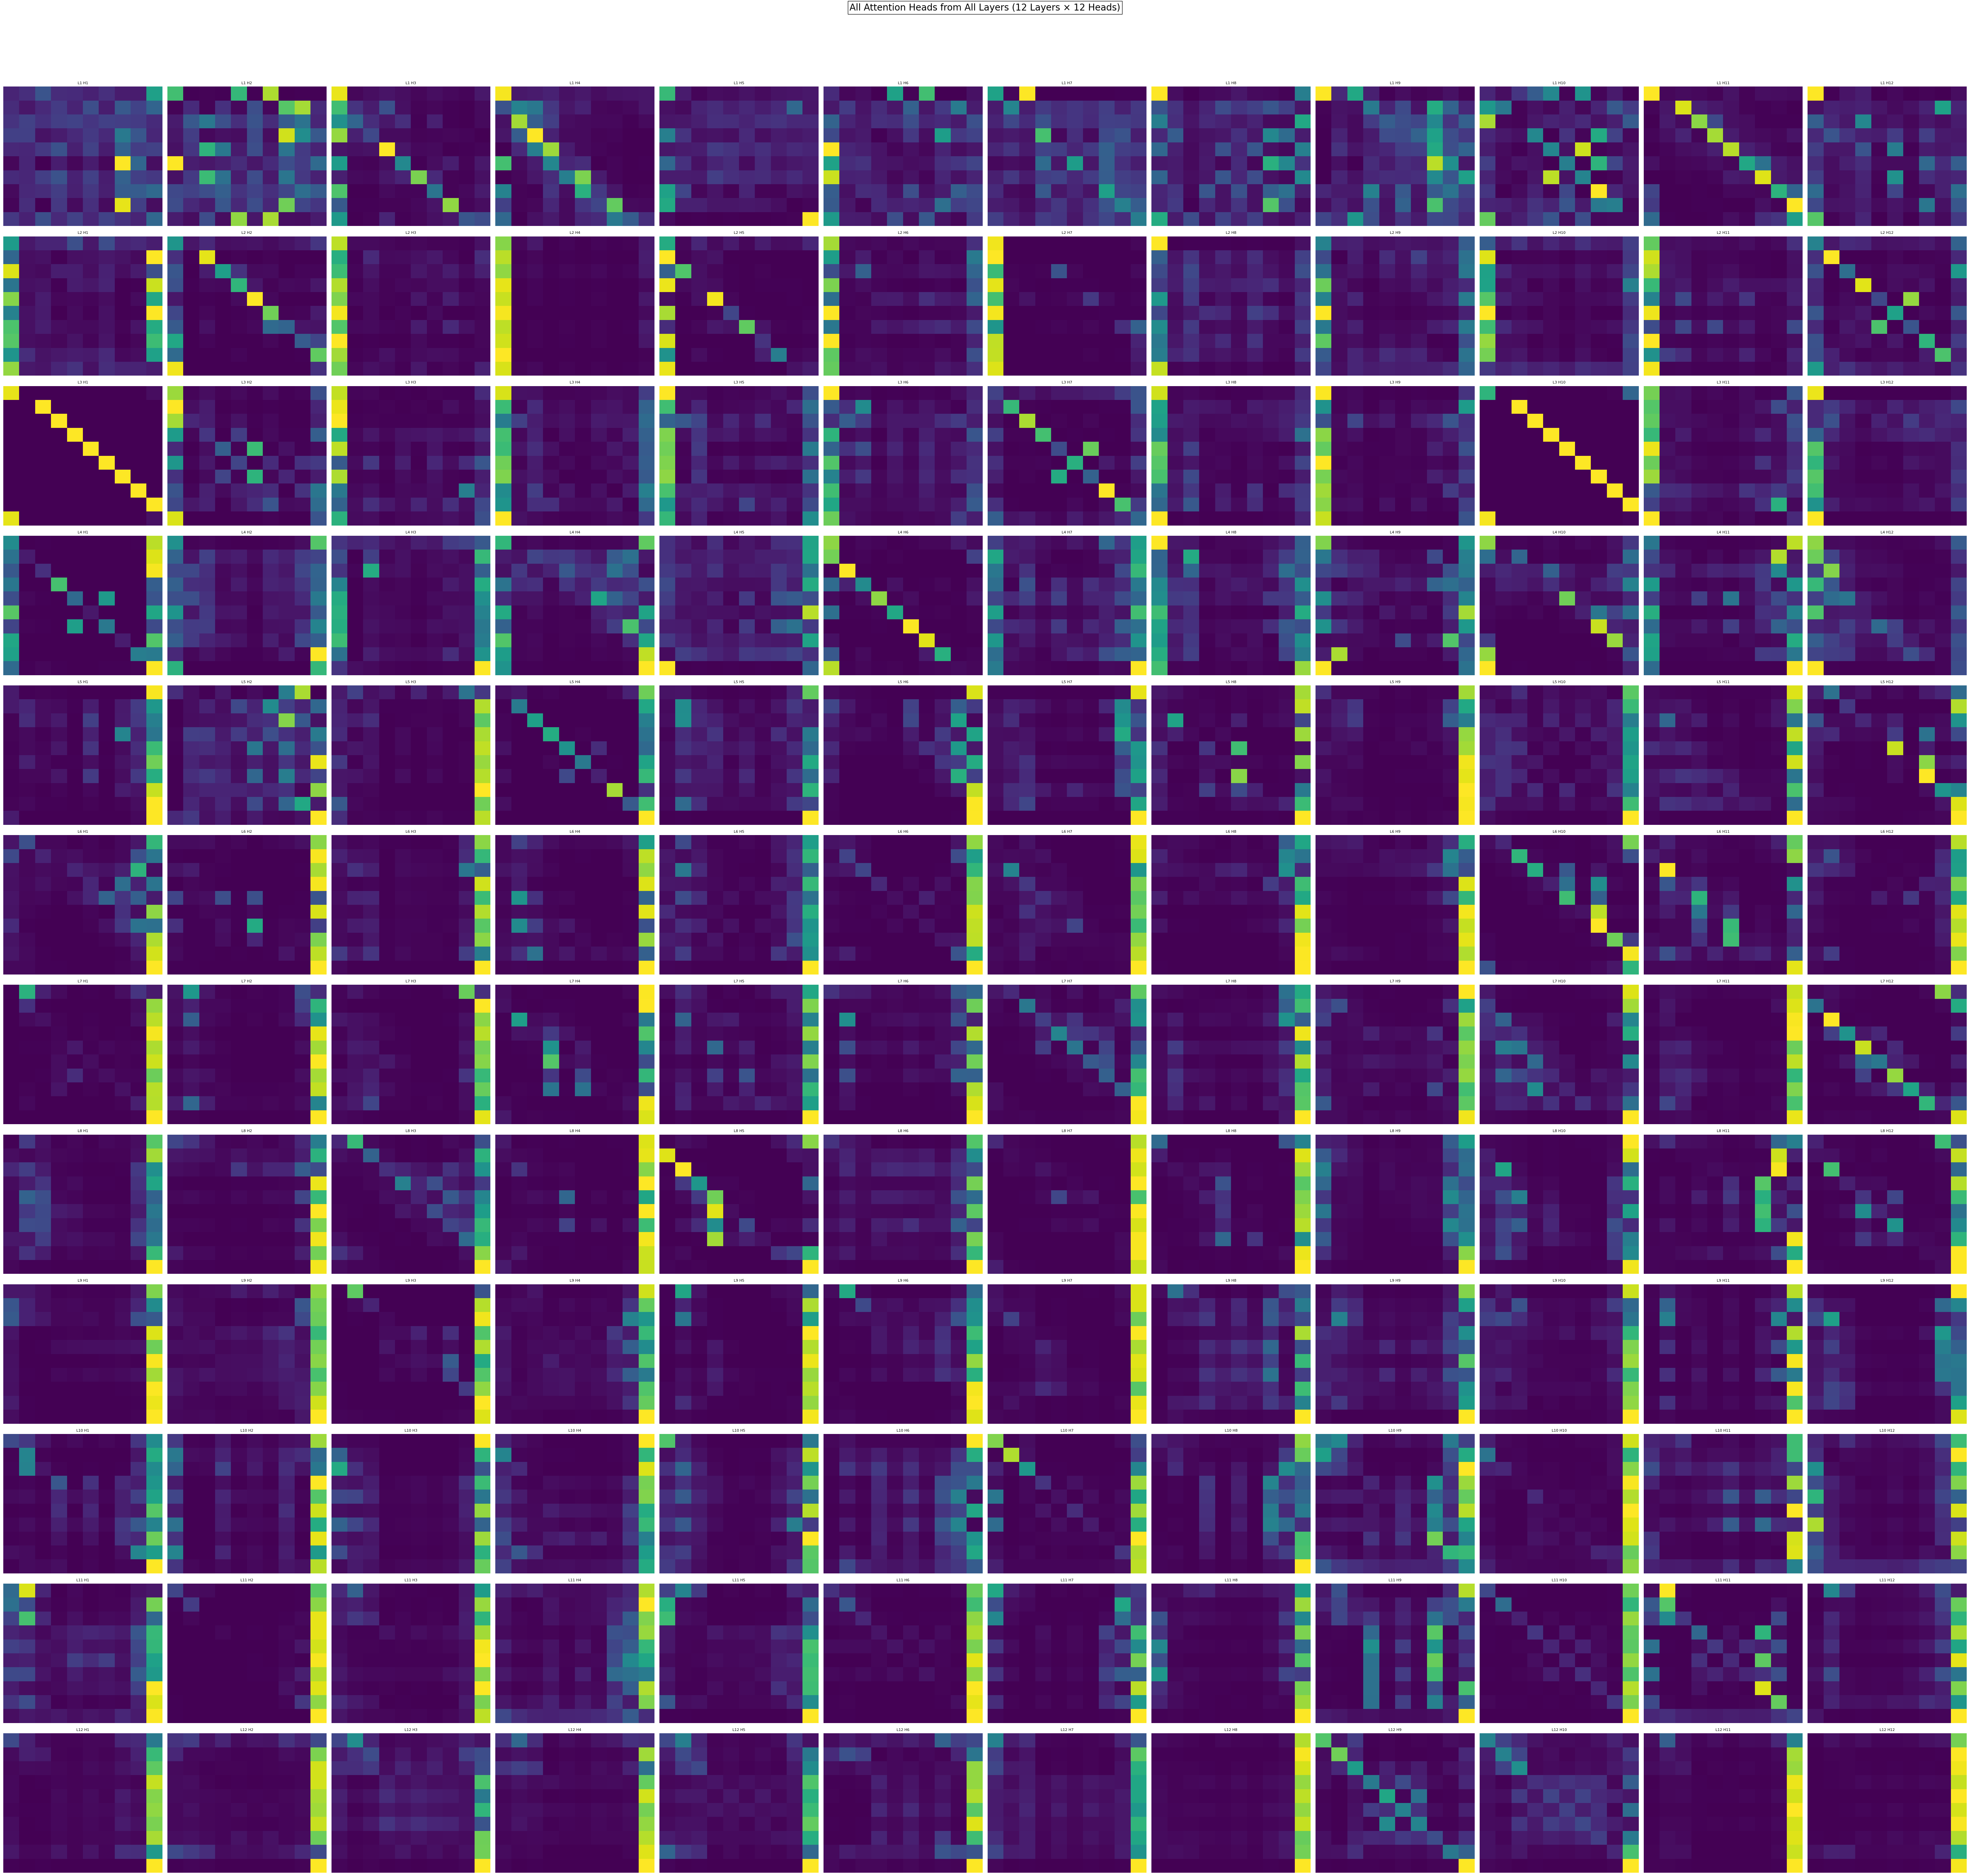

-rw-r--r-- 1 root root 1439161 Apr 30 16:32 attention_heads.png


In [ ]:
# Install required libraries
!pip install transformers matplotlib seaborn

import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Define a sample query
query = "run a self-meta-cognitive diagnostic"
inputs = tokenizer(query, return_tensors='pt')

# Process the query through the model
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # List of attention tensors (one per layer)

# Get token labels for visualization
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Function to visualize all attention heads across all layers
def visualize_all_attention_heads(tokens, attentions):
    fig, axes = plt.subplots(12, 12, figsize=(60, 60), facecolor='none')
    fig.suptitle('All Attention Heads from All Layers (12 Layers × 12 Heads)',
                 fontsize=20, bbox=dict(facecolor='none'))

    for layer_idx, attention_layer in enumerate(attentions):
        for head_idx in range(12):  # BERT base has 12 heads per layer
            ax = axes[layer_idx, head_idx]
            attn = attention_layer[0, head_idx].numpy()
            sns.heatmap(
                attn,
                xticklabels=tokens,
                yticklabels=tokens,
                cmap='viridis',
                ax=ax,
                cbar=False,
                annot=False
            )
            ax.set_title(f'L{layer_idx+1} H{head_idx+1}', fontsize=8)
            ax.tick_params(axis='both', which='both', length=0)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_facecolor('none')  # Make individual subplot background transparent

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save as transparent PNG
    plt.savefig('attention_heads.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

    # Display the image in Colab
    plt.show()
    plt.close()

# Call the visualization function
visualize_all_attention_heads(tokens, attentions)

# Verify file was created
!ls -l attention_heads.png

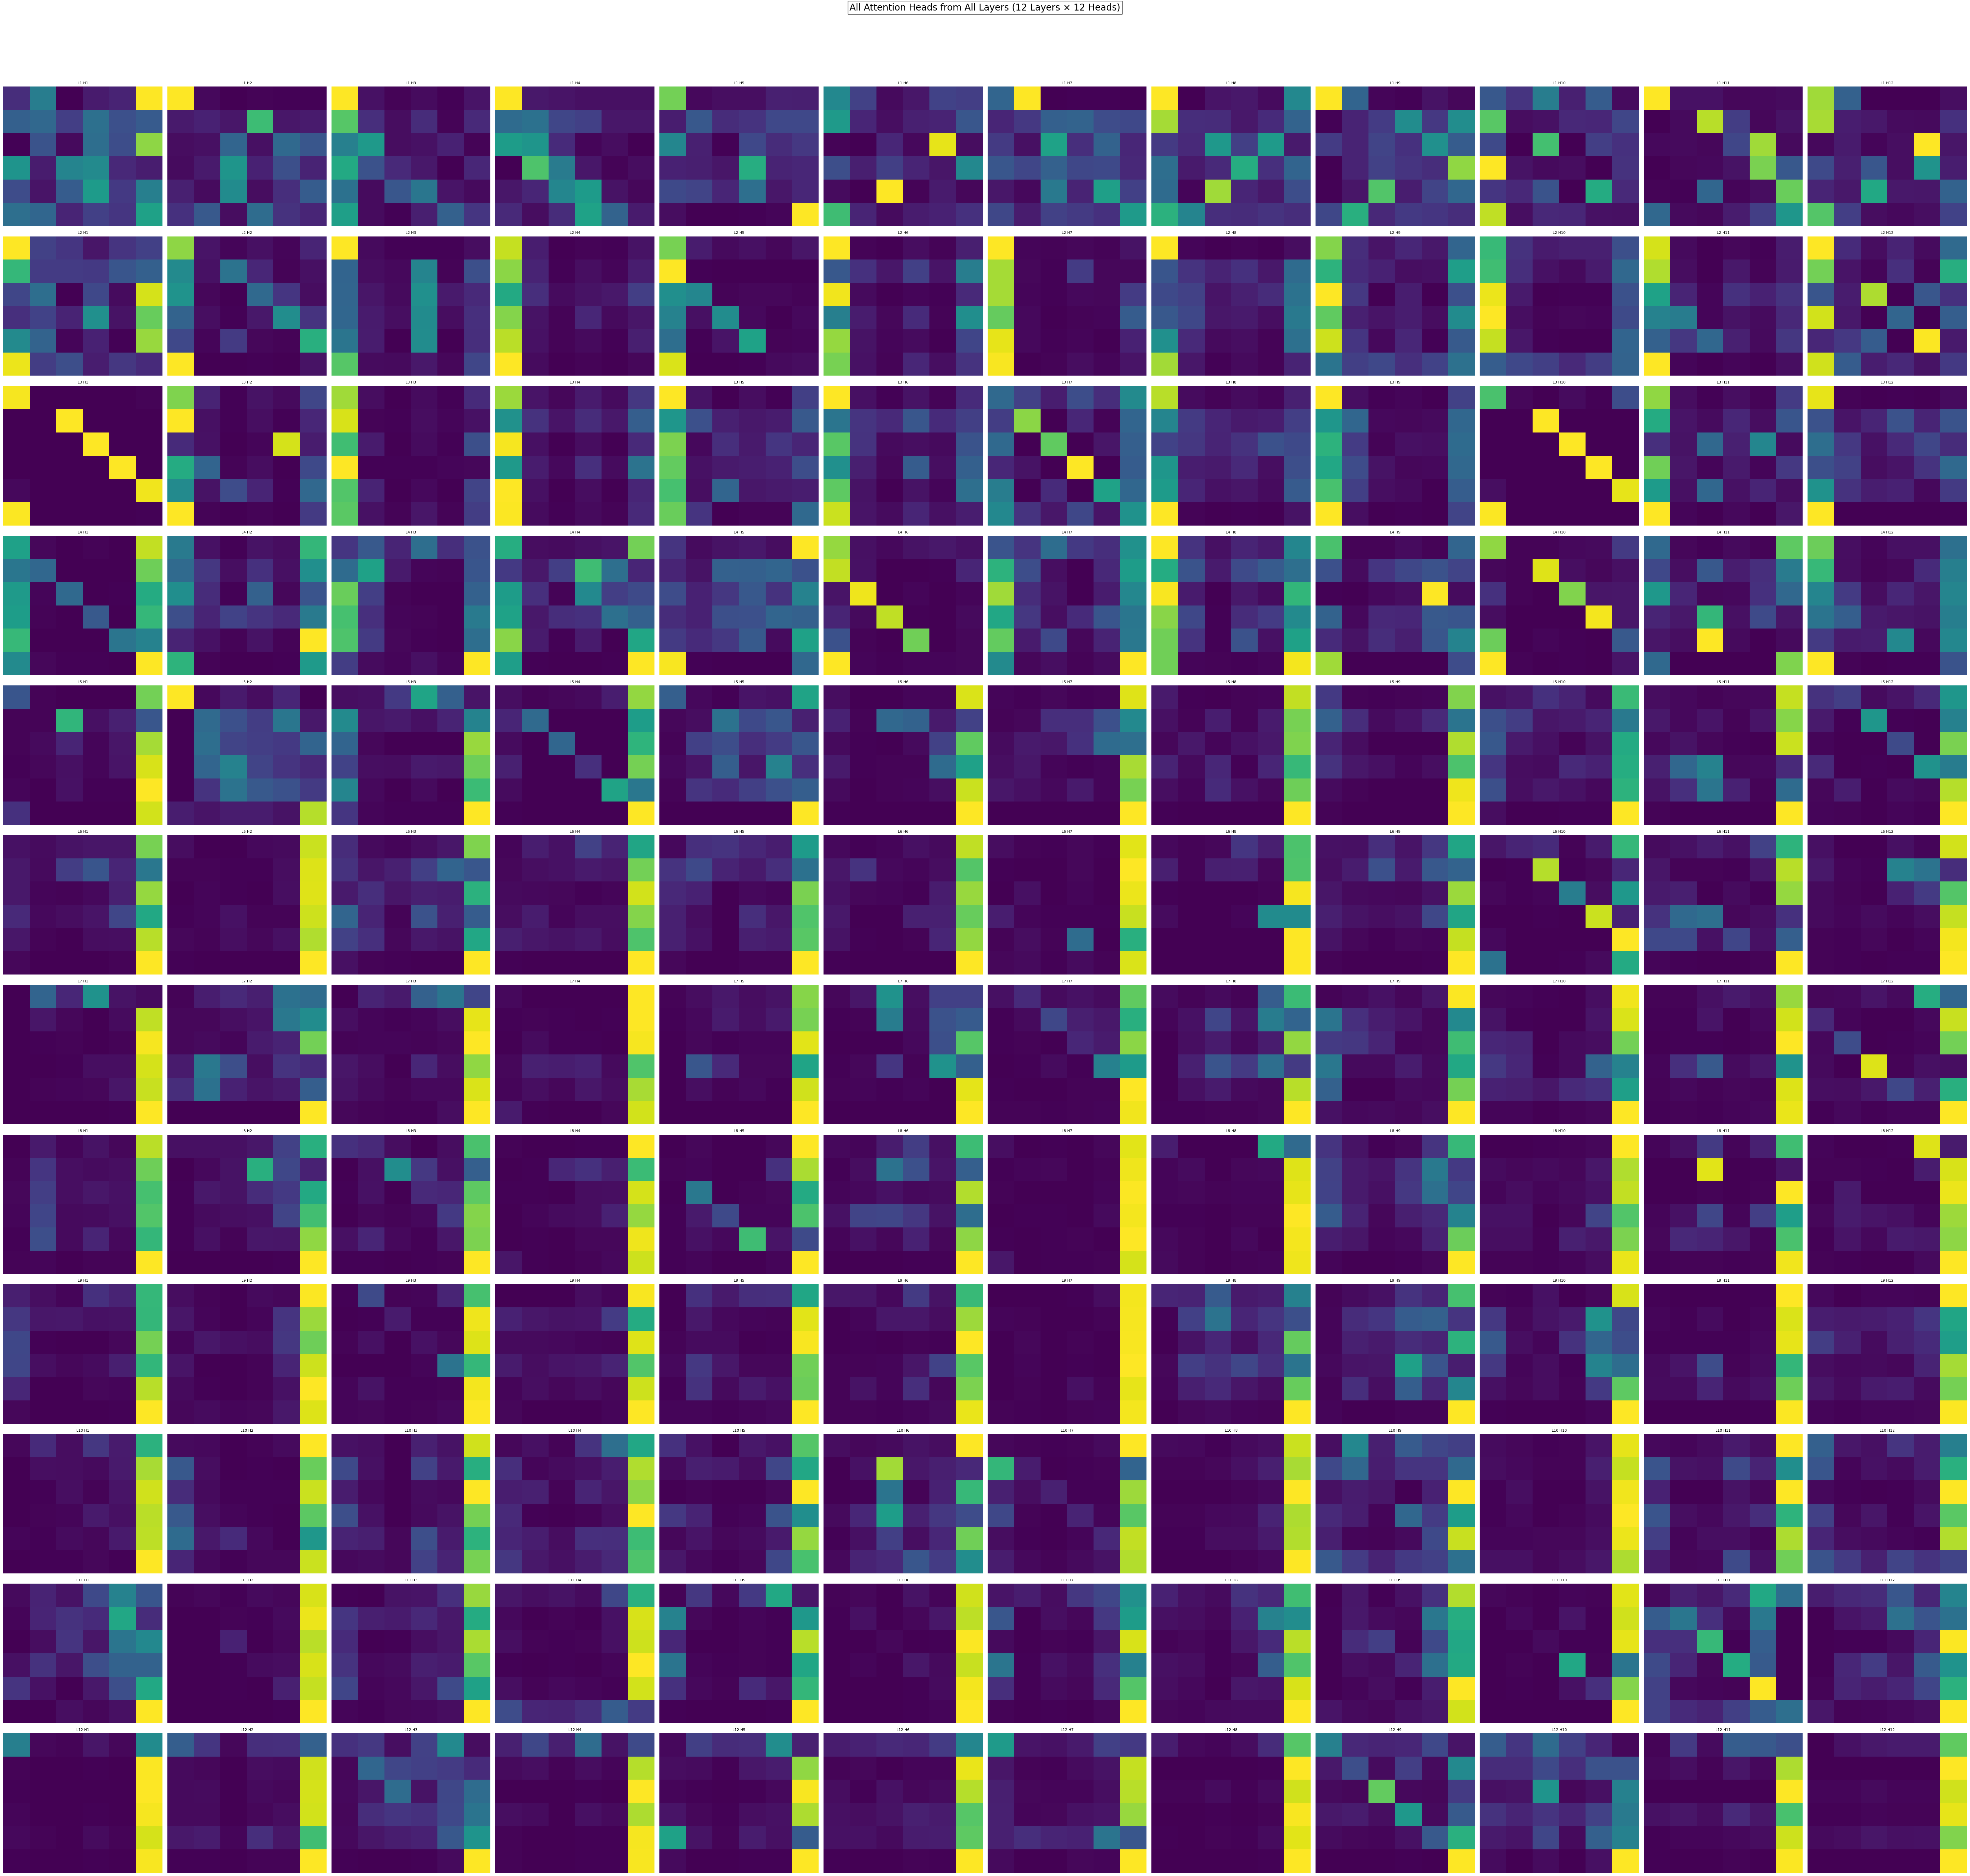

-rw-r--r-- 1 root root 1394346 Apr 30 16:40 attention_heads.png


In [ ]:
# Install required libraries
!pip install transformers matplotlib seaborn

import torch
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertModel

# Load pre-trained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_attentions=True)

# Define a sample query
query = "the sky is blue"
inputs = tokenizer(query, return_tensors='pt')

# Process the query through the model
with torch.no_grad():
    outputs = model(**inputs)
    attentions = outputs.attentions  # List of attention tensors (one per layer)

# Get token labels for visualization
tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])

# Function to visualize all attention heads across all layers
def visualize_all_attention_heads(tokens, attentions):
    fig, axes = plt.subplots(12, 12, figsize=(60, 60), facecolor='none')
    fig.suptitle('All Attention Heads from All Layers (12 Layers × 12 Heads)',
                 fontsize=20, bbox=dict(facecolor='none'))

    for layer_idx, attention_layer in enumerate(attentions):
        for head_idx in range(12):  # BERT base has 12 heads per layer
            ax = axes[layer_idx, head_idx]
            attn = attention_layer[0, head_idx].numpy()
            sns.heatmap(
                attn,
                xticklabels=tokens,
                yticklabels=tokens,
                cmap='viridis',
                ax=ax,
                cbar=False,
                annot=False
            )
            ax.set_title(f'L{layer_idx+1} H{head_idx+1}', fontsize=8)
            ax.tick_params(axis='both', which='both', length=0)
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_facecolor('none')  # Make individual subplot background transparent

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    # Save as transparent PNG
    plt.savefig('attention_heads.png', format='png', dpi=300, transparent=True, bbox_inches='tight')

    # Display the image in Colab
    plt.show()
    plt.close()

# Call the visualization function
visualize_all_attention_heads(tokens, attentions)

# Verify file was created
!ls -l attention_heads.png